# Predictive Modeling for Heart Disease

### Group Name & Members
- Group Name: 51
- Group Members: Dan Clarke (s3873755), Andrew Mina (s3807663), Hemanth Kumar Mahendra Kumar (s3823997)

## Table of Contents
- [Introduction](#introduction)
    - [Report Overview](#report)
    - [Overview of Methodology](#methodology)
- [Preparing the Data for Predictive Modeling](#prepare)
    - [Splitting Data and Target](#split)
    - [One-Hot Encoding](#encode)
    - [Scaling and Normalising Features](#features)
- [Predictive Modeling](#predict)
    - [Feature Selection](#select)
        - [Performance with Full Set of Features](#fullselect)
        - [F Score Feature Selection](#fscoreselect)
        - [Mutual Information Feature Selection](#MIselect)
        - [Random Forest Importance Feature Selection](#RFIselect)
        - [spFSR Feature Selection](#spFSRselect)
        - [Performance Comparison of Feature Selection Methods](#performselect)
    - [Model Fitting & Tuning](#tuning)
        - [Train-Test Split](#split)
        - [Select the Six Best Features](#six)        
        - [KNN Hyperparameter Tuning](#KNN)
        - [Decision Tree Hyperparamter Tunning](#DT)
        - [Gaussian Naive Bayes Hyperparameter Tuning](#GB)
        - [Support Vector Machines Hyperparameter Tuning](#SVM)
        - [Random Forest Hyperparameter Tuning](#RF)
        - [Best Score Summary](#BSsummary)
    - [Model Comparison](#compare)
        - [Area Under the Curve](#area)
        - [Paired T-Test Comparison](#pairedttest)
        - [Classification Report: Accuracy, Precision, Recall, & F1 Score](#classification)
        - [Confusion Matrix](#confusion)
        - [Profit Matrix](#profit)
- [Critique & Limitations](#critique)
- [Summary & Conclusions](#conclusion)
    - [Project Summary](#psummary)
    - [Summary of Findings](#fsummary)
    - [Conclusions](#conclusions)
- [References](#references)

# Introduction <a name="introduction"></a>

## Report Overview <a name="report"></a>
Following Phase 1 of the Assignment, the purpose of Phase 2 was to implement Machine Learning models on the heart disease dataset for predictive modeling purposes.

In this report the data was prepared including relevant features being one-hot encoded and all features scaled and normalised.

Following the data preparation Feature Selection was undertaken, in which the best descriptive features in the dataset were determined using a number of different methods. These methods included: F-Score, Mutual Information, Random Forest Importance, and SpFSR feature selection.

After this, Hyper-Parameter Fine-Tuning was undertaken on a variety of different machine learning models using the best descriptive features identified in the Feature Selection section. The models used in the Hyper-Parameter Fine-Tuning Process were the: K-Nearest Neighbors (KNN), Decision Tree, Gaussian Naïve Bayes, Support Vector Machines (SVM) and Random Forest models. 

The performance of the machine learning models was then compared using Area Under the Curve (AUC) and cross-validation processes. Further model comparison methods used included a Confusion Matrix, Profit/Loss matrix, and a Classification Report that included accuracy, precision, recall, and F1 scores.

Finally, the strengths and limitations associated with the reports methodology were addressed and the findings of the report were summarised.

## Overview of Methodology
The Predictive Modeling section of this report followed three main processes:
1. Feature Selection
2. Model Fitting & Tuning
3. Model Comparison

In the Feature Selection section the best descriptive features were determined. Firstly, the performance of all the descriptive features was examined using 5-fold cross-validation repeated three times and the scoring metric, Area Under the Curve. To see if a better performance could be achieved with only a select number of descriptive features the following feature selection methods were used: F-Score, Mutual Information, Random Forest Importance and SpFSR. These methods were run over different numbers of features to see how many features produced optimal performance in these methods. It was found the 6 features produced the best overall performance in each feature selection method, with SpFSR, F-Score, and Mutual Information performing equally well.

In the Model Fitting & Tuning section a 70:30 Train-Test split was applied to the data. The D_train and D_test data was then spliced so it only contained the 6 best features as determined by the SpFSR feature selection. The 6 features from SpFSR were selected as this feature selection method had slightly better performance than the F-Score and Mutual Information methods. Hyper-Parameter Fine-Tuning was then undertaken for K-Nearest Neighbors, Decision Tree, Gaussian Naive-Bayes, Support Vector Machines, and Random Forest models. In the Hyper-Parameter Fine-Tuning process a Grid Search method was employed and the Area Under the Curve was used as the scoring metric for all models. Parameters within each model were selected by re-running the models codes with different parameters and using the parameters that achieved optimal performance for each model.

In the Model Comparison section the models were compared on their scores with regards to Area Under the Curve, Accuracy, Precision, Recall, F1 scores within the Classification Report, True Positive Rate within the Confusion Matrix and Net Profit using a Profit Matrix. All these techniques were used to try and determine what the best Machine Learning model was for predicting the presence or absence of heart disease based on the dataset.

# Preparing the Data for Predictive Modeling <a name="prepare"></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) 
from scipy import stats
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection as fs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

Current working directory: /Users/danielclarke


In [3]:
os.chdir('/Users/danielclarke/Desktop/RMIT Masters of Analytics/Machine Learning/Python Data')
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /Users/danielclarke/Desktop/RMIT Masters of Analytics/Machine Learning/Python Data


*The SpFSR module is imported after defining the working directory as the material necessary to importing the SpFSR module in Python are contained in the above file path.*

In [4]:
from spFSR import SpFSR

In [5]:
heart = pd.read_csv(r"/Users/danielclarke/Desktop/RMIT Masters of Analytics/Machine Learning/Python Data/Data_Group51.csv")

In [6]:
heart.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [7]:
heart = heart[heart['cholesterol'] != 0] 
heart = heart[heart['resting bp s'] != 0]
heart = heart[heart['ST slope'] != 0]

In [8]:
heart.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [9]:
z = np.abs(stats.zscore(heart))
print(np.where(z>3))

(array([ 28,  30,  76, 103, 109, 149, 167, 242, 251, 331, 331, 420, 445,
       561, 588, 600, 679, 805, 837, 840, 866, 902, 999]), array([4, 4, 4, 4, 3, 4, 9, 3, 4, 4, 7, 3, 4, 3, 3, 9, 9, 9, 9, 3, 4, 3,
       9]))


In [10]:
heart = heart[((z < 3)).all(axis=1)]

## Splitting Data and Target <a name="split"></a>

In [11]:
Data = heart.drop(columns='target')
target = heart['target']
target.value_counts()

0    536
1    459
Name: target, dtype: int64

## One Hot Encoding <a name="encode"></a>
The variables Chest Pain Type, resting ECG, and ST Slope were converted from numerical to object variables in order to one-hot encode them. These were the only variables that needed one-hot encoding in the dataset as the other variables were either numerical in nature such as Age or were already been one-hot encoded by the creator of the dataset.

In [12]:
Data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
dtype: object

In [13]:
Data['chest pain type']=Data['chest pain type'].astype('object')
Data['resting ecg']=Data['resting ecg'].astype('object')
Data['ST slope']=Data['ST slope'].astype('object')

In [14]:
categorical_cols = Data.columns[Data.dtypes==object].tolist()
categorical_cols

['chest pain type', 'resting ecg', 'ST slope']

In [15]:
for col in categorical_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)

Data = pd.get_dummies(Data)

In [16]:
Data.head(n=10)

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_0,resting ecg_1,resting ecg_2,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,0,0,1,0,1,0,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1,0,0
3,48,0,138,214,0,108,1,1.5,0,0,0,1,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1,0,0
5,39,1,120,339,0,170,0,0.0,0,0,1,0,1,0,0,1,0,0
6,45,0,130,237,0,170,0,0.0,0,1,0,0,1,0,0,1,0,0
7,54,1,110,208,0,142,0,0.0,0,1,0,0,1,0,0,1,0,0
8,37,1,140,207,0,130,1,1.5,0,0,0,1,1,0,0,0,1,0
9,48,0,120,284,0,120,0,0.0,0,1,0,0,1,0,0,1,0,0


## Scaling and Normalising Features <a name="features"></a>
The features were scaled and normalised using the MinMaxScaler function in the sklearn module.

In [17]:
Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

In [18]:
pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_0,resting ecg_1,resting ecg_2,ST slope_1,ST slope_2,ST slope_3
68,0.591837,1.0,0.545455,0.542169,0.0,0.564885,1.0,0.255814,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
569,0.122449,0.0,0.295455,0.376506,0.0,0.923664,0.0,0.186047,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
57,0.489796,1.0,0.227273,0.774096,0.0,0.190840,1.0,0.255814,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
351,0.734694,1.0,0.579545,0.665663,1.0,0.335878,1.0,0.441860,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
497,0.591837,1.0,0.659091,0.575301,0.0,0.312977,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# Predictive Modelling <a name="predict"></a>

## Feature Selection <a name="select"></a>
In this section of the report a variety of feature selection methods were used to determine the best features to use going forward. After running all the feature s"election code below with different numbers of features, it was decided that 6 features was the optimal number as it yielded the best results for all the below feature selection methods.

### Performance with Full Set of Features <a name="fullselect"></a>

In [19]:
clf = DecisionTreeClassifier(random_state=999)
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)
scoring_metric = 'roc_auc'
cv_results_full = cross_val_score(estimator=clf,
                             X=Data,
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_full

array([0.88400488, 0.88109508, 0.89739943, 0.86011784, 0.91218001,
       0.89585877, 0.91913856, 0.83914059, 0.90511987, 0.89739943,
       0.90425315, 0.85229581, 0.92304957, 0.89435189, 0.87088582])

In [20]:
cv_results_full.mean().round(3)

0.889

In [21]:
num_features = 6

### F Score Feature Selection <a name="fscoreselect"></a>

In [22]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
fs_indices_fscore

array([15, 16,  6, 11,  7,  5])

In [23]:
best_features_fscore = Data_df.columns[fs_indices_fscore].values
best_features_fscore

array(['ST slope_1', 'ST slope_2', 'exercise angina', 'chest pain type_4',
       'oldpeak', 'max heart rate'], dtype=object)

In [24]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([512.69538405, 416.58643828, 373.91795116, 358.83621232,
       294.14727648, 189.47896498])

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

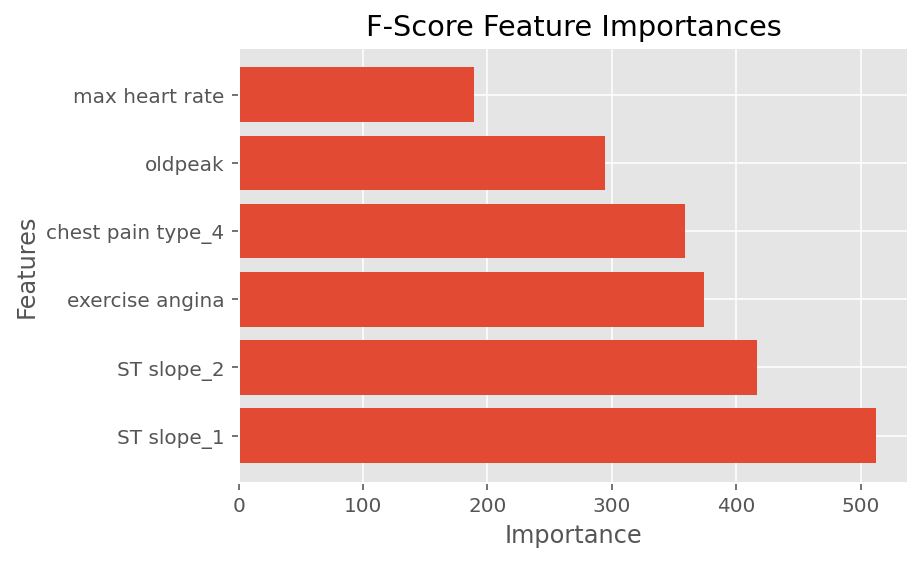

In [26]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

In [27]:
Data[:, fs_indices_fscore].shape

(995, 6)

In [28]:
cv_results_fscore = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.904

### Mutual Information Feature Selection <a name="MIselect"></a>

In [29]:
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(Data, target)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = Data_df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['ST slope_1', 'oldpeak', 'ST slope_2', 'exercise angina',
       'chest pain type_4', 'max heart rate'], dtype=object)

In [30]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.17336358, 0.14466025, 0.13611683, 0.13369312, 0.13336647,
       0.12489547])

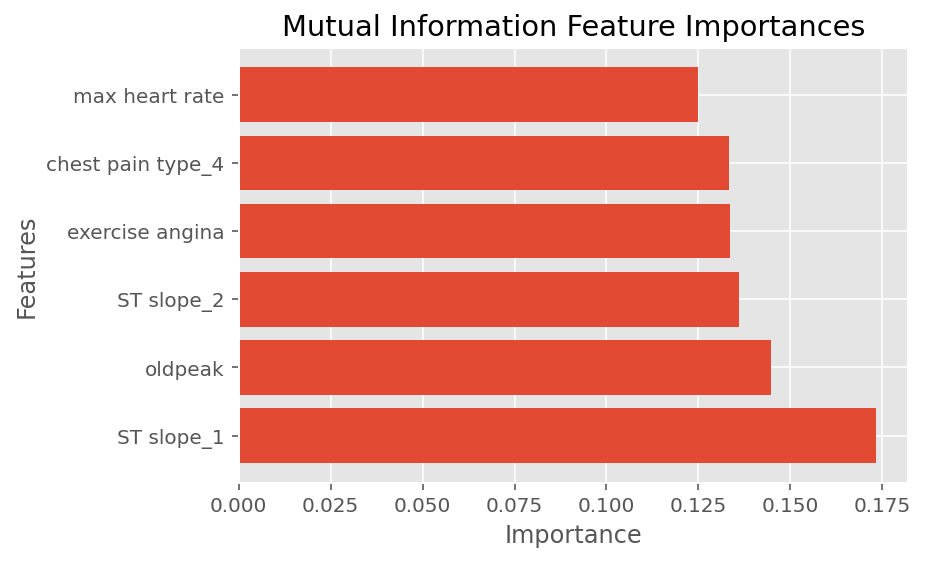

In [31]:
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information')

In [32]:
cv_results_mutual_info = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_mutual_info],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_mutual_info.mean().round(3)

0.904

### Random Forest Importance Feature Selection <a name="RFIselect"></a>

In [33]:
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [34]:
best_features_rfi = Data_df.columns[fs_indices_rfi].values
best_features_rfi

array(['ST slope_1', 'max heart rate', 'oldpeak', 'ST slope_2',
       'exercise angina', 'chest pain type_4'], dtype=object)

In [35]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.12291659, 0.10706106, 0.10436127, 0.09380158, 0.09231572,
       0.09075689])

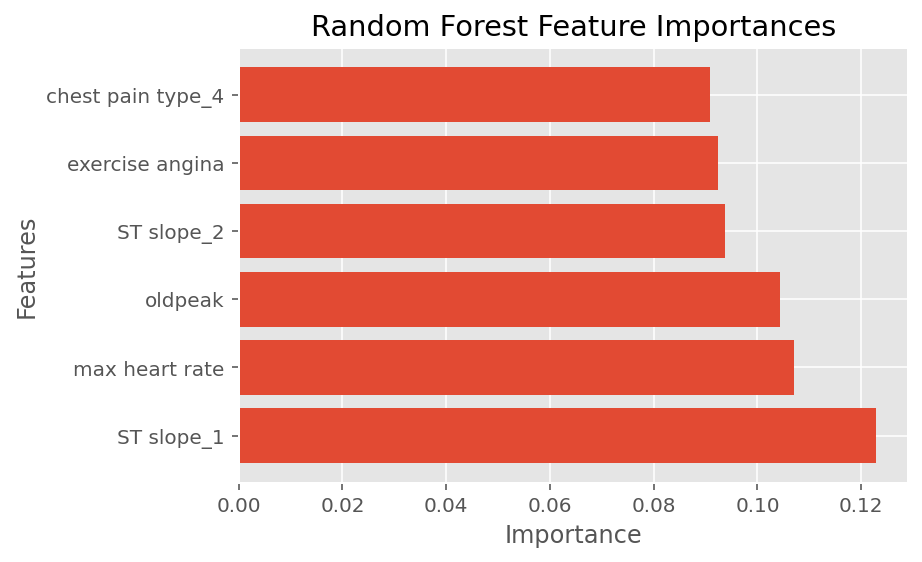

In [36]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

In [37]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_rfi],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_rfi.mean().round(3)

0.904

### spFSR Feature Selection <a name="spFSRselect"></a>

In [38]:
sp_engine = SpFSR(x=Data, y=target, pred_type='c', wrapper=clf, scoring='roc_auc')

In [39]:
np.random.seed(999)
sp_output = sp_engine.run(num_features=num_features).results

SpFSR-INFO: Wrapper: DecisionTreeClassifier(random_state=999)
SpFSR-INFO: Hot start: True
SpFSR-INFO: Hot start range: 0.2
SpFSR-INFO: Feature weighting: False
SpFSR-INFO: Scoring metric: roc_auc
SpFSR-INFO: Number of jobs: 1
SpFSR-INFO: Number of observations in the dataset: 995
SpFSR-INFO: Number of observations used: 995
SpFSR-INFO: Number of features available: 18
SpFSR-INFO: Number of features to select: 6
SpFSR-INFO: iter_no: 0, num_ft: 6, value: 0.892, st_dev: 0.019, best: 0.892 @ iter_no 0
SpFSR-INFO: iter_no: 10, num_ft: 6, value: 0.879, st_dev: 0.025, best: 0.916 @ iter_no 3
SpFSR-INFO: ===> iter_no: 15, same feature stall limit reached, initializing search...
SpFSR-INFO: iter_no: 20, num_ft: 6, value: 0.907, st_dev: 0.015, best: 0.916 @ iter_no 3
SpFSR-INFO: ===> iter_no: 23, same feature stall limit reached, initializing search...
SpFSR-INFO: iter_no: 30, num_ft: 6, value: 0.911, st_dev: 0.022, best: 0.916 @ iter_no 3
SpFSR-INFO: ===> iter_no: 36, same feature stall limit r

In [40]:
fs_indices_spsa = sp_output.get('selected_features')
fs_indices_spsa

[15, 6, 7, 11, 1, 5]

In [41]:
best_features_spsa = Data_df.columns[fs_indices_spsa]
best_features_spsa

Index(['ST slope_1', 'exercise angina', 'oldpeak', 'chest pain type_4', 'sex',
       'max heart rate'],
      dtype='object')

In [42]:
feature_importances_spsa = sp_output.get('selected_ft_importance')
feature_importances_spsa

array([ 0.11642675,  0.08324853,  0.07973922,  0.00131446, -0.01688048,
       -0.01730697])

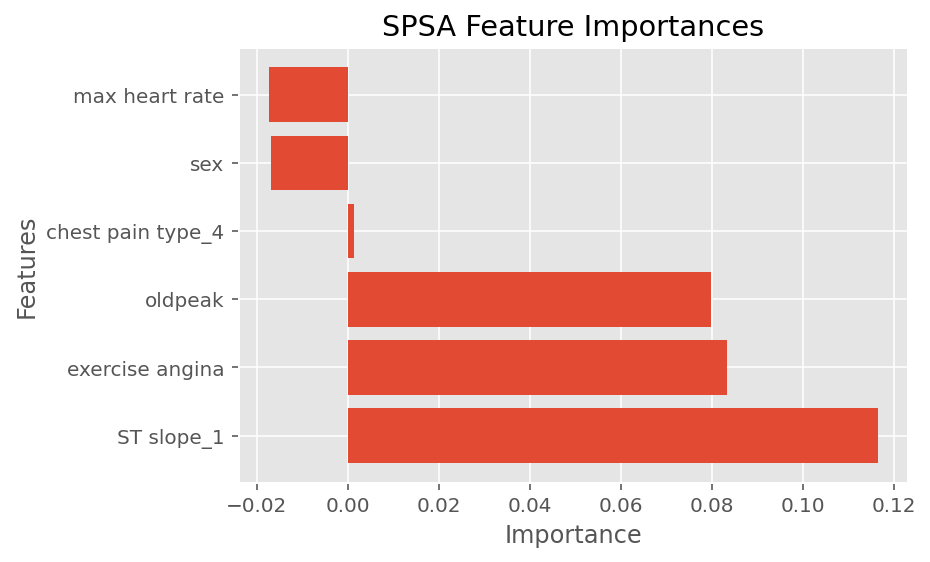

In [43]:
plot_imp(best_features_spsa, feature_importances_spsa, 'SPSA')

In [44]:
cv_results_spsa = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_spsa],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_spsa.mean().round(3)

0.911

### Performance Comparison of Feature Selection Methods <a name="performselect"></a>
It can be seen that SPSA feature selection yielded the best results. When all the feature selection methods were compared to using the full dataset significant differences between the full dataset and F-Score, Mutual Information, Random Forest Importance, and SPSA methods could be seen. However, when these methods performance were compared with each other no significance difference was seen, giving evidence for them all performing equally well. As SPSA yielded slightly better results than the other methods, the 6 features selected by it will be used going forward into the Model Fitting & Tuning section of this report.

In [45]:
print('Full Set of Features:', cv_results_full.mean().round(3))
print('F-Score:', cv_results_fscore.mean().round(3))
print('Mutual Information:', cv_results_mutual_info.mean().round(3))
print('RFI:', cv_results_rfi.mean().round(3))
print('SPSA:', cv_results_spsa.mean().round(3)) 

Full Set of Features: 0.889
F-Score: 0.904
Mutual Information: 0.904
RFI: 0.904
SPSA: 0.911


In [46]:
print(stats.ttest_rel(cv_results_full, cv_results_fscore).pvalue.round(3))
print(stats.ttest_rel(cv_results_full, cv_results_mutual_info).pvalue.round(3))
print(stats.ttest_rel(cv_results_full, cv_results_rfi).pvalue.round(3))
print(stats.ttest_rel(cv_results_full, cv_results_spsa).pvalue.round(3))

0.017
0.009
0.011
0.005


In [49]:
print(stats.ttest_rel(cv_results_spsa, cv_results_fscore).pvalue.round(3))
print(stats.ttest_rel(cv_results_spsa, cv_results_mutual_info).pvalue.round(3))
print(stats.ttest_rel(cv_results_fscore, cv_results_mutual_info).pvalue.round(3))
print(stats.ttest_rel(cv_results_rfi, cv_results_fscore).pvalue.round(3))
print(stats.ttest_rel(cv_results_rfi, cv_results_mutual_info).pvalue.round(3))
print(stats.ttest_rel(cv_results_rfi, cv_results_spsa).pvalue.round(3))

0.302
0.304
0.592
0.996
0.334
0.284


## Model Fitting & Tuning <a name="tuning"></a>
For this section of the report a 70:30 Train-Test split was applied to the data. The D_train and D_test data was then sliced so it only contained the 6 best features as determined by the SpFSR feature selection method above. Hyperparameter tuning was then undertaken for K-Nearest Neighbors, Decision Tree, Gaussian Naive-Bayes, Support Vector Machines, and Random Forest models. In the Hyperparameter tuning process a Grid Search method was employed and the Area Under the Curve was used as the scoring metric for all models. Parameters within each model were selected by re-running to the code with different parameters and using the parameters that achieved optimal performance for each model.

### Train-Test Split <a name="split"></a>

In [50]:
D_train, D_test, t_train, t_test = train_test_split(Data,
                                                   target,
                                                   test_size = 0.3,
                                                   random_state = 999,
                                                   stratify = target)

### Selecting the 6 Best Features <a name="six"></a>

In [51]:
D_train_fs = D_train[:, fs_indices_spsa]
D_test_fs = D_test[:, fs_indices_spsa]

### KNN Hyperparameter Tuning <a name="KNN"></a>

In [52]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [53]:
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}

In [54]:
gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,
                      scoring='roc_auc', 
                      return_train_score=True)

In [55]:
gs_KNN.fit(D_train_fs, t_train);

Fitting 15 folds for each of 21 candidates, totalling 315 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    2.9s finished


In [56]:
gs_KNN.best_params_

{'n_neighbors': 6, 'p': 1}

In [57]:
gs_KNN.best_score_

0.916997863247863

In [58]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN

,n_neighbors,p,test_score,metric
0,1,1,0.857005,Manhattan
1,1,2,0.863457,Euclidean
2,1,5,0.861373,Minkowski
3,2,1,0.887928,Manhattan
4,2,2,0.893913,Euclidean
5,2,5,0.896189,Minkowski
6,3,1,0.902054,Manhattan
7,3,2,0.907794,Euclidean
8,3,5,0.908920,Minkowski
9,4,1,0.907310,Manhattan


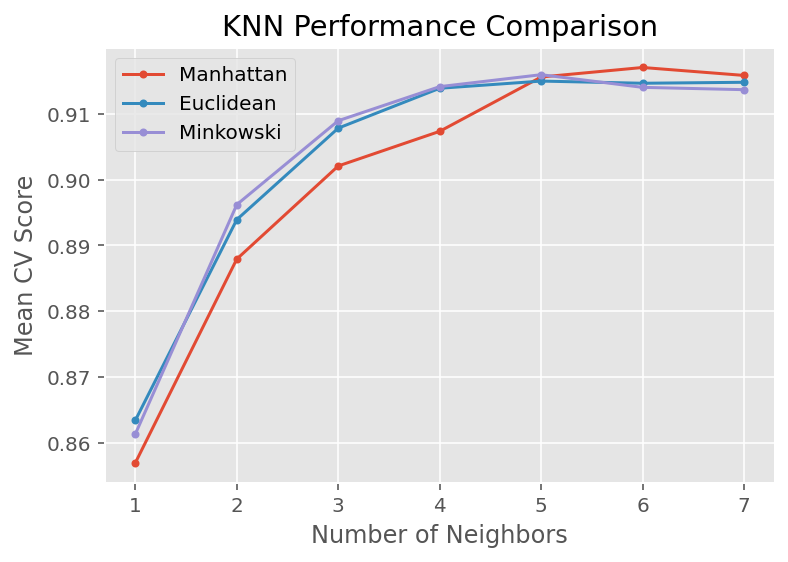

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

### Decision Tree Hyperparameter Tuning <a name="DT"></a>

In [60]:
df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc')

gs_DT.fit(D_train_fs, t_train);

Fitting 15 folds for each of 32 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    1.0s finished


In [61]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [62]:
gs_DT.best_score_

0.8971971153846154

In [63]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

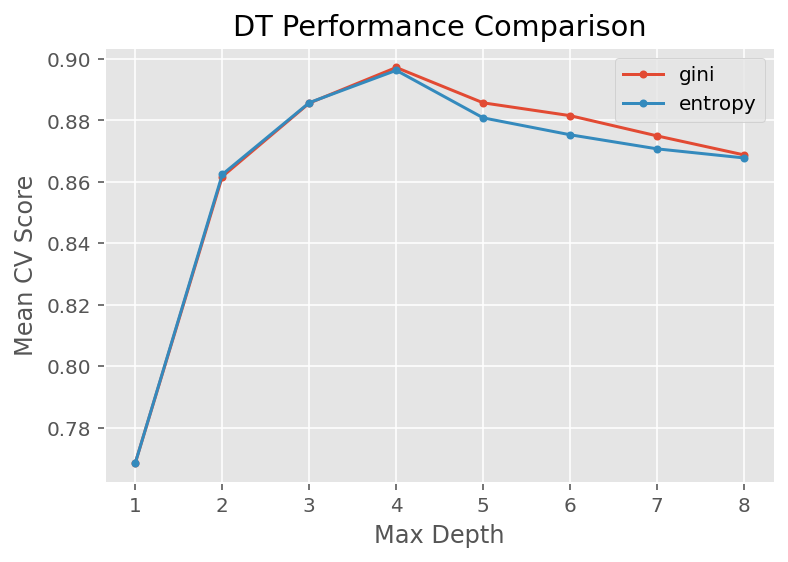

In [64]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

### Gaussian Naive Bayes Hyperparameter Tuning <a name="GB"></a>

In [65]:
np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='roc_auc')

Data_fs_transformed = PowerTransformer().fit_transform(D_train_fs)

gs_NB.fit(Data_fs_transformed, t_train);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    3.0s finished


In [66]:
gs_NB.best_params_

{'var_smoothing': 0.004328761281083057}

In [67]:
gs_NB.best_score_

0.90413344017094

In [68]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

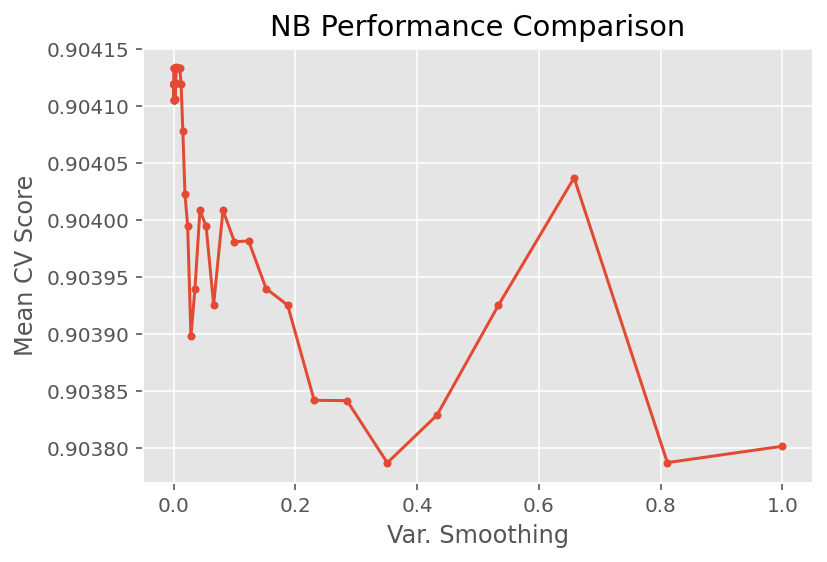

In [69]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

### Support Vector Machines Hyperparameter Tuning <a name="SVM"></a>
The code from the Feature Ranking tutorials (Aksakalli, 2021) was adapted for the Support Vector Machines model, with ideas for the parameters coming from our own research (Liu, 2020; Saini, 2020).

In [70]:
params_SVM = { 'C':[0.1,1,100,1000], 'kernel':['rbf', 'poly', 'sigmoid'],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

gs_SVM = GridSearchCV(estimator = SVC(),
                      param_grid = params_SVM,
                      cv = cv_method,
                      verbose = 1,
                      refit = True,
                      scoring = 'roc_auc')

gs_SVM.fit(D_train_fs, t_train)

Fitting 15 folds for each of 60 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   27.3s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='roc_auc', verbose=1)

In [71]:
gs_SVM.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [72]:
gs_SVM.best_score_

0.9071037393162392

In [73]:
results_SVM = pd.DataFrame(gs_SVM.cv_results_['params'])
results_SVM['test_score'] = gs_SVM.cv_results_['mean_test_score']
results_SVM.columns

Index(['C', 'gamma', 'kernel', 'test_score'], dtype='object')

(0.9, 0.903)

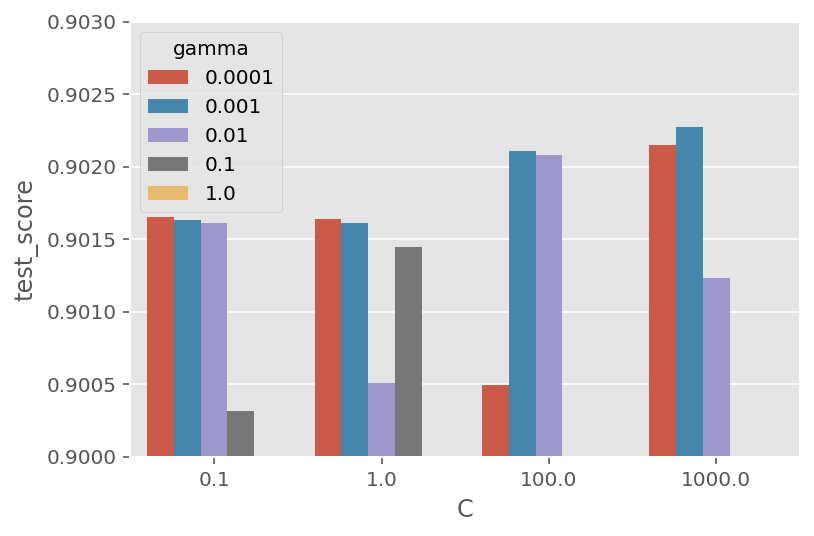

In [74]:
svmbp = sns.barplot(x="C",
            y="test_score",
            hue = 'gamma',
            ci = None,
            data=results_SVM)
plt.ylim(0.9, 0.903)

### Random Forest Hyperparameter Tuning <a name="RF"></a>

In [75]:
rf_classifier = RandomForestClassifier(random_state=999)

params_rf = {'n_estimators': [100, 250, 500],
             'max_depth': [5, 7, 10, 12]}

gs_rf = GridSearchCV(estimator = rf_classifier,
                      param_grid = params_rf,
                      cv = cv_method,
                      verbose = 1,
                      n_jobs = -2,
                      scoring = 'roc_auc')

gs_rf.fit(D_train_fs, t_train)

Fitting 15 folds for each of 12 candidates, totalling 180 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-2)]: Done 180 out of 180 | elapsed:   21.2s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=RandomForestClassifier(random_state=999), n_jobs=-2,
             param_grid={'max_depth': [5, 7, 10, 12],
                         'n_estimators': [100, 250, 500]},
             scoring='roc_auc', verbose=1)

In [76]:
gs_rf.best_params_

{'max_depth': 10, 'n_estimators': 250}

In [77]:
gs_rf.best_score_

0.9407010683760684

In [78]:
results_RF = pd.DataFrame(gs_rf.cv_results_['params'])
results_RF['test_score'] = gs_rf.cv_results_['mean_test_score']
results_RF.columns

Index(['max_depth', 'n_estimators', 'test_score'], dtype='object')

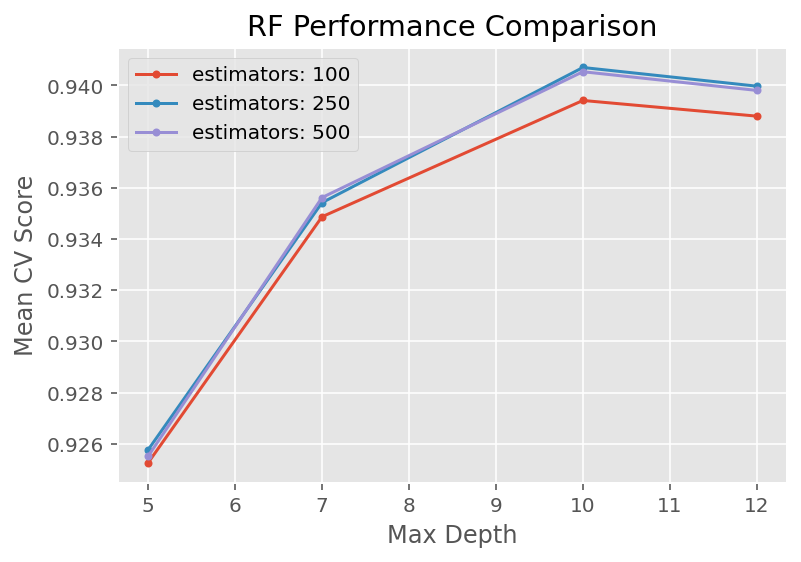

In [79]:
for i in results_RF['n_estimators'].unique():
    temp = results_RF[results_RF['n_estimators'] == i]
    plt.plot(temp['max_depth'], temp['test_score'], marker = '.', label = 'estimators: ' + str(i))
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("RF Performance Comparison")
plt.show()

### Best Scores Summary <a name="BSsummary"></a>

In [80]:
print('KNN:', gs_KNN.best_score_.round(3))
print('Decision Tree:', gs_DT.best_score_.round(3))
print('Gaussian Naive Bayes:', gs_NB.best_score_.round(3))
print('Support Vector Machines:', gs_SVM.best_score_.round(3))
print('Random Forest:', gs_rf.best_score_.round(3))

KNN: 0.917
Decision Tree: 0.897
Gaussian Naive Bayes: 0.904
Support Vector Machines: 0.907
Random Forest: 0.941


## Model Comparison <a name="compare"></a>

### Area Under the Curve <a name="area"></a>
When the Area Under the Curve scores were compared significant differences can be seen between the Random Forest model and the Decision Tree model and KNN model. A significant difference could also be seen between SVM and the Decision Tree and KNN models. Furthermore, the Gaussian Naive Bayes model was not significantly different from any model. Moreover, no significant differences can be seen between the Random Forest, SVM, and Gaussian Naive Bayes models. This outlines the the Random Forest, SVM, and Gaussian Naive Bayes models perform equally when measured by Area Under the Curve.

In [81]:
cv_method_ttest = StratifiedKFold(n_splits=10, random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                 X=D_test_fs,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.910066863283775

In [82]:
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                X=D_test_fs,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.8950074741435035

In [83]:
D_test_transformed_fs = PowerTransformer().fit_transform(D_test)

cv_results_NB = cross_val_score(estimator=gs_NB.best_estimator_,
                                X=D_test_transformed_fs,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.9150866596638657

In [84]:
cv_results_SVM = cross_val_score(estimator=gs_SVM.best_estimator_,
                                X=D_test_fs,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_SVM.mean()

0.9311065772462832

In [85]:
cv_results_RF = cross_val_score(estimator=gs_rf.best_estimator_,
                                X=D_test_fs,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_RF.mean()

0.9395543794440853

### Paired T-Test Comparison <a name="pairedttest"></a>

In [89]:
print(stats.ttest_rel(cv_results_KNN, cv_results_DT))
print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))
print(stats.ttest_rel(cv_results_RF, cv_results_SVM))
print(stats.ttest_rel(cv_results_RF, cv_results_DT))
print(stats.ttest_rel(cv_results_RF, cv_results_KNN))
print(stats.ttest_rel(cv_results_RF, cv_results_NB))
print(stats.ttest_rel(cv_results_SVM, cv_results_DT))
print(stats.ttest_rel(cv_results_SVM, cv_results_KNN))
print(stats.ttest_rel(cv_results_SVM, cv_results_NB))

Ttest_relResult(statistic=1.363840227742048, pvalue=0.20575115772893512)
Ttest_relResult(statistic=-0.29482485334319364, pvalue=0.7748152985222437)
Ttest_relResult(statistic=-1.0786631784846425, pvalue=0.308797134511954)
Ttest_relResult(statistic=0.7099751895482738, pvalue=0.495702062157379)
Ttest_relResult(statistic=3.914291285476644, pvalue=0.003541567702476308)
Ttest_relResult(statistic=3.0694033603566115, pvalue=0.013366878447171665)
Ttest_relResult(statistic=1.687804144814289, pvalue=0.12572014783382232)
Ttest_relResult(statistic=2.6627385654131075, pvalue=0.02592916398181725)
Ttest_relResult(statistic=2.4454484155270397, pvalue=0.037032187050864404)
Ttest_relResult(statistic=1.0529820508213432, pvalue=0.319797401540237)


### Classification Report: Accuracy, Precision, Recall, & F1 Score <a name="classification"></a>
In the below Classification Reports it can be seen that the Random Forest model outperforms all other models in terms of recall, accuracy, and F1-score. It's performance on recall is also backed up by number of true positives it predicted in the Confusion Matrix. Furthermore, the Random Forest model's net profit was the highest out of all the other models. These scores give evidence for the Random Forest model potentially being the better model out of the others in this report.

In [90]:
pred_KNN = gs_KNN.predict(D_test_fs)

In [91]:
D_test_fs_transformed = PowerTransformer().fit_transform(D_test_fs)
pred_NB = gs_NB.predict(D_test_fs_transformed)

In [92]:
pred_DT = gs_DT.predict(D_test_fs)

In [93]:
pred_SVM = gs_SVM.predict(D_test_fs)

In [94]:
pred_rf = gs_rf.predict(D_test_fs)

In [96]:
print("\nClassification Report for K-Nearest Neighbor") 
print(metrics.classification_report(t_test, pred_KNN))
print("\nClassification Report for Naive Bayes") 
print(metrics.classification_report(t_test, pred_NB))
print("\nClassification Report for Decision Tree") 
print(metrics.classification_report(t_test, pred_DT))
print("\nClassification Report for Support Vector Machines") 
print(metrics.classification_report(t_test, pred_SVM))
print("\nClassification Report for Random Forest") 
print(metrics.classification_report(t_test, pred_rf))


Classification Report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       161
           1       0.87      0.75      0.81       138

    accuracy                           0.84       299
   macro avg       0.84      0.83      0.83       299
weighted avg       0.84      0.84      0.83       299


Classification Report for Naive Bayes
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       161
           1       0.85      0.82      0.83       138

    accuracy                           0.85       299
   macro avg       0.85      0.85      0.85       299
weighted avg       0.85      0.85      0.85       299


Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       161
           1       0.82      0.75      0.78       138

    accuracy                           0.81       299
  

### Confusion Matrix <a name="confusion"></a>

In [97]:
print("\nConfusion Matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test, pred_KNN))
print("\nConfusion Matrix for Naive Bayes") 
print(metrics.confusion_matrix(t_test, pred_NB))
print("\nConfusion Matrix for Decision Tree") 
print(metrics.confusion_matrix(t_test, pred_DT))
print("\nConfusion Matrix for Support Vector Machines") 
print(metrics.confusion_matrix(t_test, pred_SVM))
print("\nConfusion Matrix for Random Forest") 
print(metrics.confusion_matrix(t_test, pred_rf))


Confusion Matrix for K-Nearest Neighbor
[[146  15]
 [ 34 104]]

Confusion Matrix for Naive Bayes
[[141  20]
 [ 25 113]]

Confusion Matrix for Decision Tree
[[138  23]
 [ 35 103]]

Confusion Matrix for Support Vector Machines
[[144  17]
 [ 26 112]]

Confusion Matrix for Random Forest
[[148  13]
 [ 16 122]]


### Profit Matrix <a name="profit"></a>

In [98]:
profit_matrix = np.array([[0, -10], [-50, 100]])

In [101]:
print("\nProfit Matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test, pred_KNN)*profit_matrix)
print("\nProfit Matrix for Naive Bayes") 
print(metrics.confusion_matrix(t_test, pred_NB)*profit_matrix)
print("\nProfit Matrix for Decision Tree") 
print(metrics.confusion_matrix(t_test, pred_DT)*profit_matrix)
print("\nProfit Matrix for Support Vector Machines") 
print(metrics.confusion_matrix(t_test, pred_SVM)*profit_matrix)
print("\nProfit Matrix for Random Forest") 
print(metrics.confusion_matrix(t_test, pred_rf)*profit_matrix)


Profit Matrix for K-Nearest Neighbor
[[    0  -150]
 [-1700 10400]]

Profit Matrix for Naive Bayes
[[    0  -200]
 [-1250 11300]]

Profit Matrix for Decision Tree
[[    0  -230]
 [-1750 10300]]

Profit Matrix for Support Vector Machines
[[    0  -170]
 [-1300 11200]]

Profit Matrix for Random Forest
[[    0  -130]
 [ -800 12200]]


In [102]:
print("\nNet Profit for K-Nearest Neighbor")
print(np.sum(metrics.confusion_matrix(t_test, pred_KNN)*profit_matrix))
print("\nNet Profit for Naive Bayes")
print(np.sum(metrics.confusion_matrix(t_test, pred_NB)*profit_matrix))
print("\nNet Profit for Decision Tree")
print(np.sum(metrics.confusion_matrix(t_test, pred_DT)*profit_matrix))
print("\nNet Profit for Support Vector Machines")
print(np.sum(metrics.confusion_matrix(t_test, pred_SVM)*profit_matrix))
print("\nNet Profit for Random Forest")
print(np.sum(metrics.confusion_matrix(t_test, pred_rf)*profit_matrix))


Net Profit for K-Nearest Neighbor
8550

Net Profit for Naive Bayes
9850

Net Profit for Decision Tree
8320

Net Profit for Support Vector Machines
9730

Net Profit for Random Forest
11270


# Critique & Limitations <a name="critique"></a>
In terms of strengths, many of the features analyzed in Phase 1 as being informative in relation to the target variable appeared regularly in feature selection analysis. Features such as ‘Oldpeak’, ‘ST-Slope’, ‘Exercise Angina’ and ‘Chest Pain Type’ appeared in all the feature selection methods used in Phase 2.  This provides confidence that the machine learning models employed understood the mechanics of the dataset and aligned with what was identified in Phase 1, as part of the exploratory analysis. 

Another strength of our approach was that for feature selection we employed a wide range of methods and for the Hyperparameter Fine-Tuning section we employed a wide range of machine learning models. This strengthens our conclusions for the best features in our dataset and what machine learning model best fits our dataset. Furthermore, the different machine learning models employed throughout Phase 2 generated consistent results, which provided confidence that our approach to predictive modeling was sound. This allowed us to select the best model from a set of strong performances across the different machine learning models.

A limitation with our approach was that when selecting the parameters for each Machine Learning model we went for the parameters that produced the highest predictive performance for each model. As such, we sacrificed the relative interpretability associated with more in-depth research into model parameters.

Furthermore, limitations exist for the machine learning models we employed. For example the Naive Bayes model ignores interactions between descriptive features when conditioned upon a given target feature. In our data-set, we have a number of descriptive features that are related to one another such as Exercise Angina, Chest Pain Type and Oldpeak and ST Slope. Although the model performs well in Phase 2 of our report and can serve as a baseline for comparison purposes with other ML models, its limitation of assuming the descriptive features are independent makes it difficult to apply to this data-set in a real-world application.

Lastly, not all possible binary classification machine learning models (e.g. Logisitic Regression) were employed in this report. Therefore, there is the possibility that there are other more suitable models for this dataset that were not examined.

# Summary & Conclusions <a name="conclusion"></a>

## Project Summary <a name="psummary"></a>
In Phase 1, we had the goal of preparing our dataset for machine learning and visualizing the data set to understand the existing relationships between the features and the binary target variable (i.e., Heart Disease). From our visualization and exploration of the data, we identified a number of key variables related to the presence of heart disease including Age, Oldpeak, ST Slope, Exercise Angina and Chest Pain Type. 

The key takeaway from our analysis is that old age, higher oldpeak measurements, presence of exercise angina, asymptomatic chest pain and an ST Slope reading of 2 (flat) or 3 (downward sloping) was more pronounced in patients with heart disease compared to patients without heart disease.

In Phase 2, our goal was to implement machine learning models on the heart disease data set for predictive modeling purposes.

Following data preparation (one-hot encoding, scaling and normalization), the best features were identified using Feature Selection methods. Using 6 features produced the best performance for the feature selection methods with SpFSR having the best performance compared to the other methods. This method identified ST-Slope, Exercise Angina, Oldpeak, and Chest Pain Type among the best features (4 of 6), which coincides with our conclusion in Phase 1.

The training and testing datasets were spliced to only include the 6 best features identified using SpFSR. The spliced dataset was then used for model fitting and hyperparameter tuning.  The hyperparameter tuning process using a Grid Search method was employed and the Area Under the Curve being used as the scoring metric for all models. Random Forest generated the best score closely followed by SVM and Gaussian Naïve Bayes. However, no significant differences were identified between these three models based on paired T-Test comparison.

According to Classification Reports however, Random Forest outperformed all other models in terms of Recall, Accuracy, and F1-Score. It's performance on Recall is also backed up by number of True Positives predicted in the Confusion Matrix. Furthermore, the Random Forest model had the highest Net Profit compared to the other models. 

The results provide evidence to suggest that the Random Forest machine learning model best predicts the outcome of heart disease (the target variable) based on the descriptive features provided.

## Summary of Findings <a name="fsummary"></a>

The Random Forest model with a maximum depth of 10, number of estimators equaling 250, and with the 6 best features selected by SpFSR produced the highest cross-validated AUC score on the training data. However, when the performance of the models was evaluated using the test data it was found that the Random Forest, Gaussian Naive Bayes, and Support Vector Machines models all performed equally when compared using the AUC score. No significant difference was observed between this three models when compared using paired t-tests. However, Random Forest and SVM both significantly outperformed the K-Nearest Neighbors and Decision Tree models. A Classification Report was used to compare the models on accuracy, recall, and F1 score. In this report the Random Forest model had the highest Accuracy, Recall, and F1 Score. Furthermore, the Confusion Matrix and Profit Matrix showed that the Random Forest had the highest True Positive Rate (backing up its high Recall score in the Classification Report) as well as having the highest Net Profit compared to the other models. 

## Conclusions <a name="conclusions"></a>
To conclude it was found that for this dataset the Random Forest model using the following six features: Sex, Exercise Angina, Chest Pain type, Oldpeak, ST Slope, and Max. Heart Rate, yielded the highest Accuracy, AUC score, Recall, F1 Score, and the highest Net Profit compared to the other models. This provided evidence for the Random Forest model being the best suited model to the heart disease dataset.

# References <a name="references"></a>

[1] Aksakalli, D. (2021). Feature Selection and Ranking in Machine Learning. Retrieved 22 May 2021, from https://www.featureranking.com/

[2] Liu, C. (2020). SVM Hyperparameter Tuning using GridSearchCV - Velocity Business Solutions Limited. Retrieved 22 May 2021, from https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

[3] Saini, B. (2020). Hyperparameter Tuning of Support Vector Machine Using GridSearchCV. Retrieved 22 May 2021, from https://medium.com/swlh/hyperparameter-tuning-of-support-vector-machine-using-gridsearchcv-4d17671d1ed2